<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
      <th>quality</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7.4</td>
      <td>0.70</td>
      <td>0.00</td>
      <td>1.9</td>
      <td>0.076</td>
      <td>11.0</td>
      <td>34.0</td>
      <td>0.9978</td>
      <td>3.51</td>
      <td>0.56</td>
      <td>9.4</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>7.8</td>
      <td>0.88</td>
      <td>0.00</td>
      <td>2.6</td>
      <td>0.098</td>
      <td>25.0</td>
      <td>67.0</td>
      <td>0.9968</td>
      <td>3.20</td>
      <td>0.68</td>
      <td>9.8</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7.8</td>
      <td>0.76</td>
      <td>0.04</td>
      <td>2.3</td>
      <td>0.092</td>
      <td>15.0</td>
      <td>54.0</td>
      <td>0.9970</td>
      <td>3.26</td>
      <td>0.65</td>
      <td>9.8</td>
      <td>0</td>
    </tr>
  </tbody>
</table>

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X_dataset = wine_quality.data.features 
y_dataset = wine_quality.data.targets

# Combine features and target into a single DataFrame
wine_quality_df = pd.concat([X_dataset, y_dataset], axis=1)

#Redefine quality 
wine_quality_df['quality'] = wine_quality_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

**Exploratory data analysis!** <br>

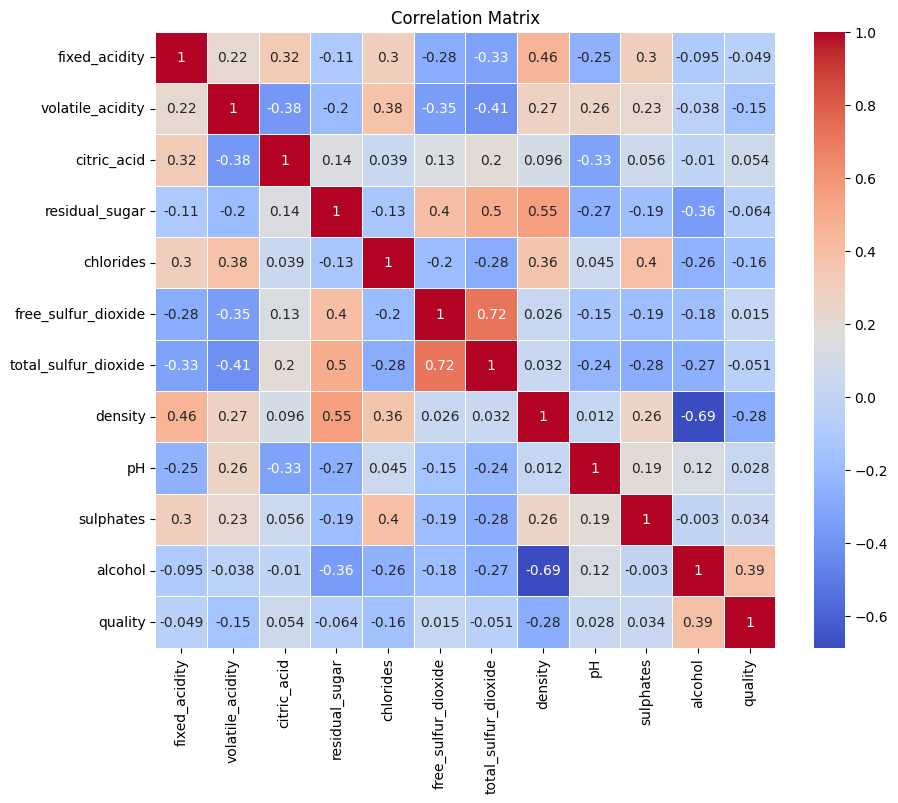

C:\Users\pucso\AppData\Local\Temp\ipykernel_14912\1309159601.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=self.data, **kwargs)


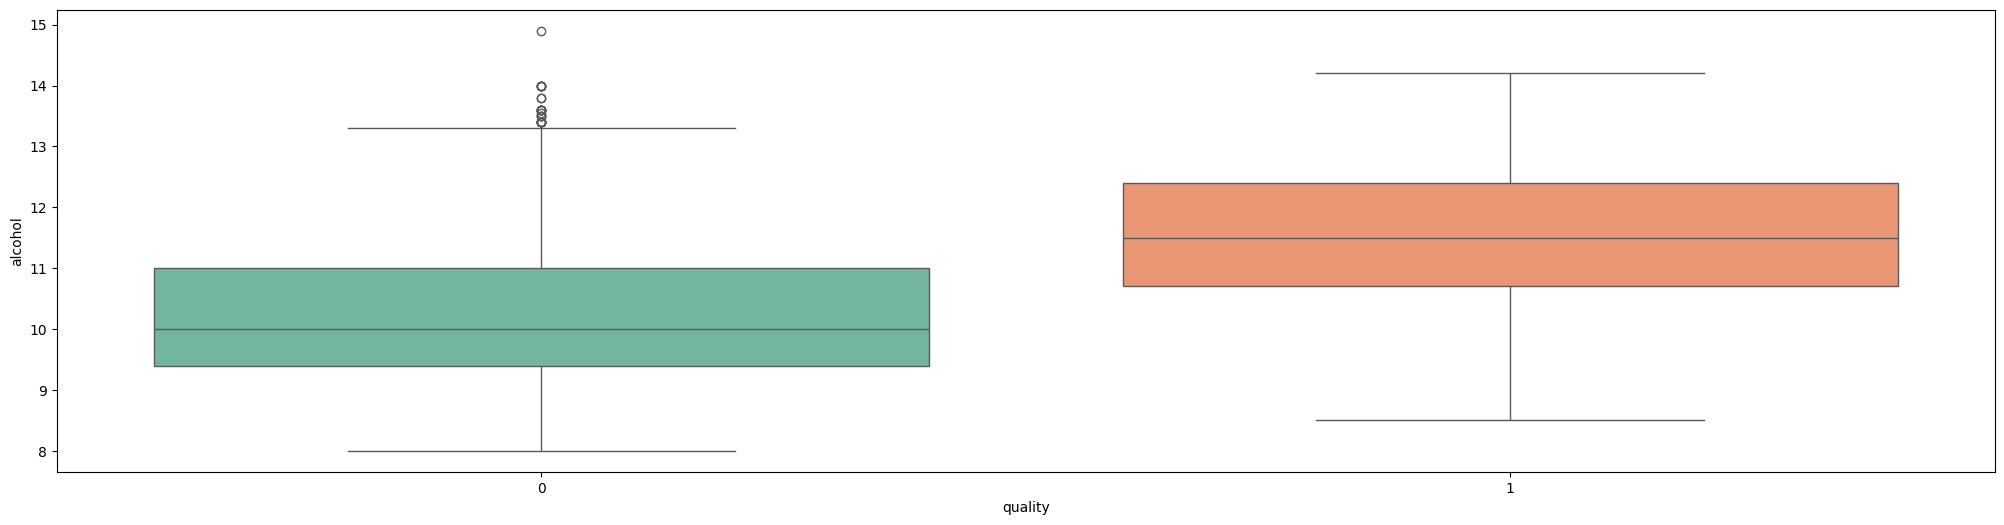

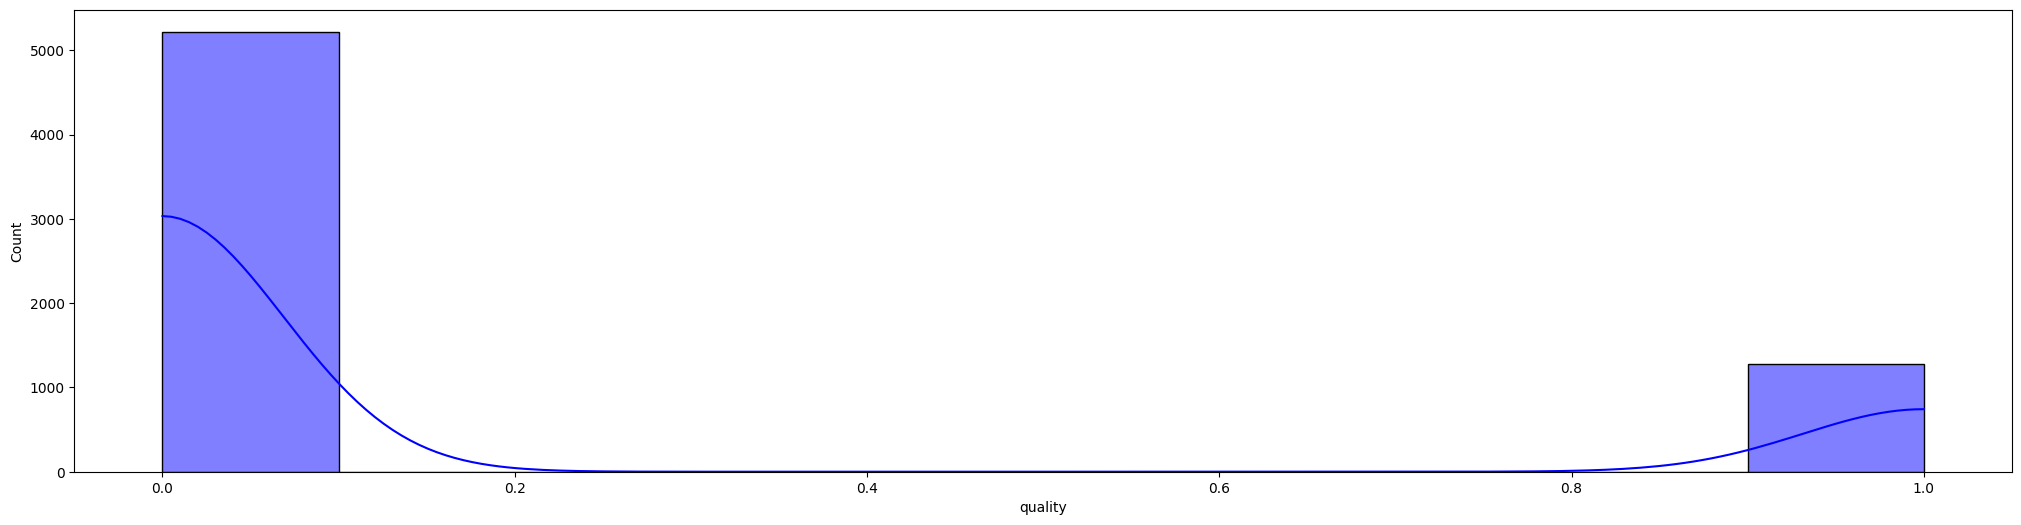

In [5]:
class DataVisualization:
    def __init__(self, data):
        self.data = data

    def correlation_matrix(self, figsize=(10, 8), cmap="coolwarm"):
        corr = self.data.corr()
        plt.figure(figsize=figsize)
        sns.heatmap(corr, annot=True, cmap=cmap, linewidths=0.5)
        plt.title("Correlation Matrix")
        plt.show()

    def boxplot(self, figsize=(25, 6), **kwargs):
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.data, **kwargs)
        plt.show()
    
    def histogram(self, figsize=(25, 6), **kwargs):
        plt.figure(figsize=figsize)
        sns.histplot(self.data, **kwargs)
        plt.show()



viz = DataVisualization(wine_quality_df)

viz.correlation_matrix()

viz.boxplot(x="quality", y="alcohol", palette="Set2")

viz.histogram(x="quality", bins=10, kde=True, color="blue")

**2. Classification I: DecisionTree and kNN**  <br>

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = wine_quality_df.drop(columns=['quality'])
y = wine_quality_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#Train a K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

#Make predictions with both models
y_pred_dt = dt_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Decision Tree predictions and evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree:")
print(f"  Accuracy:  {accuracy_dt:.2f}")
print(f"  Precision: {precision_dt:.2f}")
print(f"  Recall:    {recall_dt:.2f}")
print(f"  F1 Score:  {f1_dt:.2f}")

# K-Nearest Neighbors predictions and evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("\nK-Nearest Neighbors:")
print(f"  Accuracy:  {accuracy_knn:.2f}")
print(f"  Precision: {precision_knn:.2f}")
print(f"  Recall:    {recall_knn:.2f}")
print(f"  F1 Score:  {f1_knn:.2f}")

Decision Tree:
  Accuracy:  0.83
  Precision: 0.55
  Recall:    0.58
  F1 Score:  0.56

K-Nearest Neighbors:
  Accuracy:  0.80
  Precision: 0.47
  Recall:    0.34
  F1 Score:  0.39


The Decision Tree is clearly outperforming the K-Nearest Neighbors model based on all metrics. 
It provides better accuracy, recall, and a higher F1 score, meaning it has better generalization and performance in identifying true positives, while KNN struggles with both precision and recall.

**3. Classification II: Cross-validation** <br>


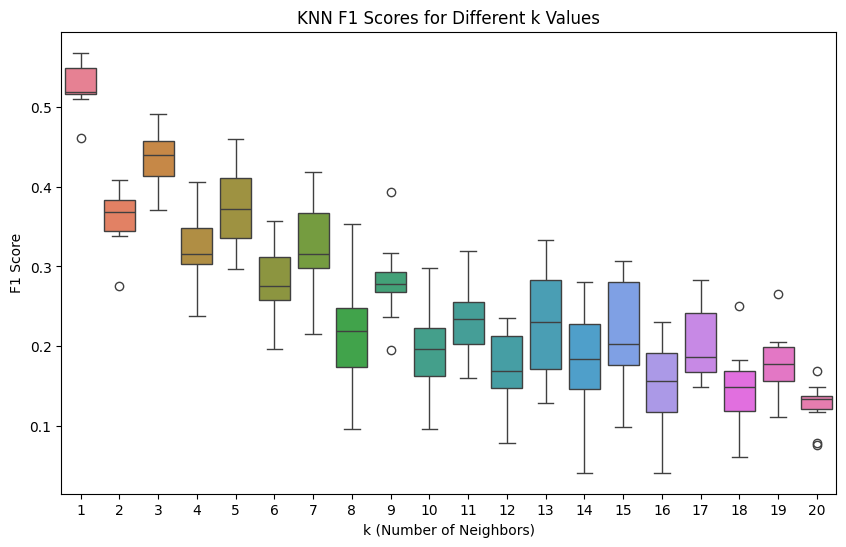

Optimal k for KNN: 1


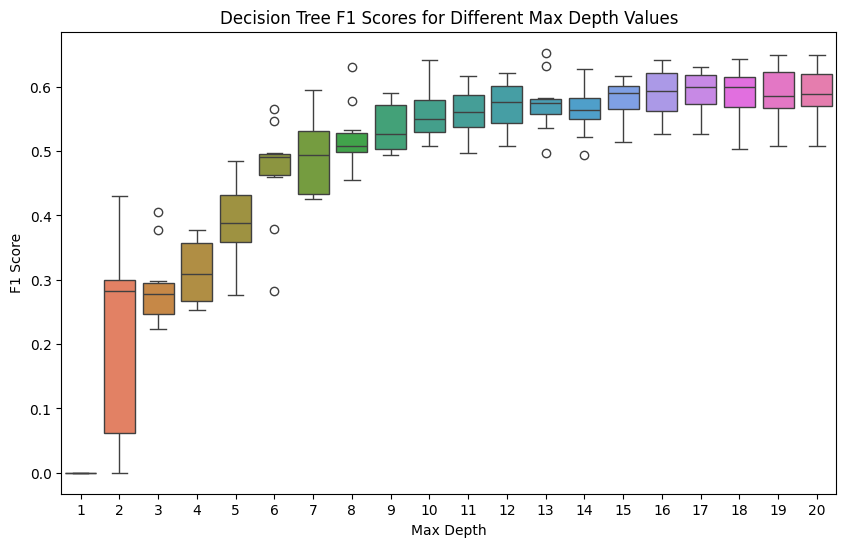

Optimal max depth for Decision Tree: 17
KNN Accuracy with k=1: 0.8128205128205128
Decision Tree Accuracy with max depth=17: 0.8333333333333334


In [7]:
from sklearn.model_selection import cross_val_score

class ModelOptimization:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def optimize_knn(self, k_values=range(1, 21)):
        f1_scores_knn = []

        for k in k_values:
            knn_model = KNeighborsClassifier(n_neighbors=k)
            f1_scores = cross_val_score(knn_model, self.X_train, self.y_train, cv=10, scoring='f1')
            f1_scores_knn.append(f1_scores)

        f1_scores_knn_df = pd.DataFrame(f1_scores_knn).T

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=f1_scores_knn_df)
        plt.title("KNN F1 Scores for Different k Values")
        plt.xlabel("k (Number of Neighbors)")
        plt.ylabel("F1 Score")
        plt.xticks(ticks=np.arange(len(k_values)), labels=k_values)
        plt.show()

        mean_f1_scores_knn = np.mean(f1_scores_knn, axis=1)
        optimal_k = k_values[np.argmax(mean_f1_scores_knn)]
        print(f"Optimal k for KNN: {optimal_k}")
        return optimal_k

    def optimize_decision_tree(self, depth_values=range(1, 21)):
        f1_scores_dt = []

        for depth in depth_values:
            dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
            f1_scores = cross_val_score(dt_model, self.X_train, self.y_train, cv=10, scoring='f1')
            f1_scores_dt.append(f1_scores)

        f1_scores_dt_df = pd.DataFrame(f1_scores_dt).T

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=f1_scores_dt_df)
        plt.title("Decision Tree F1 Scores for Different Max Depth Values")
        plt.xlabel("Max Depth")
        plt.ylabel("F1 Score")
        plt.xticks(ticks=np.arange(len(depth_values)), labels=depth_values)
        plt.show()

        mean_f1_scores_dt = np.mean(f1_scores_dt, axis=1)
        optimal_depth = depth_values[np.argmax(mean_f1_scores_dt)]
        print(f"Optimal max depth for Decision Tree: {optimal_depth}")
        return optimal_depth

    def predict_with_best_models(self, X_test, y_test, optimal_k, optimal_depth):
        knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
        knn_model.fit(self.X_train, self.y_train)
        knn_accuracy = knn_model.score(X_test, y_test)
        print(f"KNN Accuracy with k={optimal_k}: {knn_accuracy}")

        dt_model = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
        dt_model.fit(self.X_train, self.y_train)
        dt_accuracy = dt_model.score(X_test, y_test)
        print(f"Decision Tree Accuracy with max depth={optimal_depth}: {dt_accuracy}")

optimizer = ModelOptimization(X_train, y_train)
optimal_k = optimizer.optimize_knn()
optimal_depth = optimizer.optimize_decision_tree()
optimizer.predict_with_best_models(X_test, y_test, optimal_k, optimal_depth)

**4. Classification III: Own ideas** <br>


In [9]:
from sklearn.ensemble import RandomForestClassifier

depth_values = range(1, 21)
f1_scores_list = []

for act_value in depth_values:
    model = RandomForestClassifier(max_depth=act_value, random_state=42)
    f1_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
    f1_scores_list.append(f1_scores)

f1_scores_df = pd.DataFrame(f1_scores_list).T

mean_f1_scores = np.mean(f1_scores_df, axis=1)
optimal_value = depth_values[np.argmax(mean_f1_scores)]

print(f"The optimal value: {optimal_value}")

model = RandomForestClassifier(max_depth=optimal_value, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n RandomForest:")
print(f"  Accuracy:  {accuracy:.2f}")
print(f"  Precision: {precision:.2f}")
print(f"  Recall:    {recall:.2f}")
print(f"  F1 Score:  {f1:.2f}")

The optimal value: 10

 RandomForest:
  Accuracy:  0.87
  Precision: 0.76
  Recall:    0.45
  F1 Score:  0.57


Using the randomforest regressor I can achive more accurate prediction